## Summary
- Accuracy only about 0.68, even after resampling or tuning with hyperparameters
- Possibly due to the uneven distribution of data with about 60% class 0 and 40% class 1
- CV scores quite consistent, meaning that we are not overfitting or underfitting
- Target label has no or little correlation with the features
https://towardsdatascience.com/when-logistic-regression-simply-doesnt-work-8cd8f2f9d997

In [30]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error, classification_report

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import cross_val_score
from numpy import mean

from sklearn import preprocessing

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.feature_selection import RFE

## Setting Up

In [2]:
train_set = pd.read_csv('train_set_with_features.csv')

In [ ]:
kc_train = train_set.sample(5000) # For logistic regression on 5000 data

In [ ]:
kc_train.columns

Index(['Unnamed: 0', 'id', 'qid1', 'qid2', 'question1', 'question2',
       'is_duplicate', 'common_words_ratio', 'common_tokens_ratio',
       'fuzz_partial_ratio', 'min_longest_substring', 'unique_words_count',
       'common_token_ratio_min', 'fuzz_ratio', 'abs_len_difference',
       'common_stop_words_min', 'common_nouns_min', 'mean_len',
       'common_stop_words_max', 'common_nouns_max', 'ratio_len_qn',
       'common_word_ratio_max', 'common_adjectives_max',
       'fuzz_token_set_ratio', 'common_words_ratio_min',
       'common_adjectives_min', 'fuzz_token_sort_ratio',
       'max_longest_substring'],
      dtype='object')

In [ ]:
kc_train = kc_train.drop(columns = ['Unnamed: 0', 'id', 'qid1', 'qid2'], axis = 1)

In [ ]:
kc_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 58907 to 201806
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   question1               5000 non-null   object 
 1   question2               5000 non-null   object 
 2   is_duplicate            5000 non-null   int64  
 3   common_words_ratio      5000 non-null   float64
 4   common_tokens_ratio     5000 non-null   float64
 5   fuzz_partial_ratio      5000 non-null   int64  
 6   min_longest_substring   5000 non-null   float64
 7   unique_words_count      5000 non-null   int64  
 8   common_token_ratio_min  5000 non-null   float64
 9   fuzz_ratio              5000 non-null   int64  
 10  abs_len_difference      5000 non-null   int64  
 11  common_stop_words_min   5000 non-null   float64
 12  common_nouns_min        5000 non-null   float64
 13  mean_len                5000 non-null   float64
 14  common_stop_words_max   5000 non-n

In [ ]:
kc_train.head(3)

,question1,question2,is_duplicate,common_words_ratio,common_tokens_ratio,fuzz_partial_ratio,min_longest_substring,unique_words_count,common_token_ratio_min,fuzz_ratio,abs_len_difference,common_stop_words_min,common_nouns_min,mean_len,common_stop_words_max,common_nouns_max,ratio_len_qn,common_word_ratio_max,common_adjectives_max,fuzz_token_set_ratio,common_words_ratio_min,common_adjectives_min,fuzz_token_sort_ratio,max_longest_substring
58907,how do i tell if i am an intp or intj,how can i tell if i am an intp or intj,1,0.450000,0.9000,92,0.837838,9,0.081081,93,1,0.545455,0.181818,11.0,0.545455,0.181818,0.973684,0.394737,0.026316,96,0.9000,0.027027,93,0.815789
316740,where should you rent an apartment in bangalor...,where should someone rent an apartment in bang...,1,0.406250,0.8125,81,0.355556,13,0.077778,81,5,0.375000,0.125000,17.0,0.333333,0.111111,1.055556,0.231579,0.000000,93,0.8125,0.000000,86,0.336842
88436,how can i describe myself,how would i describe myself in 3 words,0,0.307692,0.5000,80,0.720000,4,0.040000,70,13,0.600000,0.000000,6.5,0.375000,0.000000,0.657895,0.421053,0.000000,91,0.8000,0.000000,70,0.473684


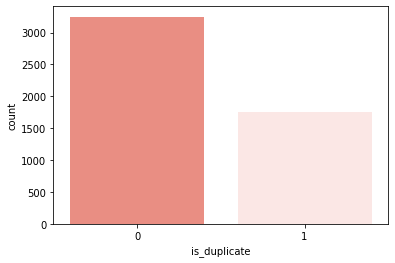

In [ ]:
sns.countplot(x = 'is_duplicate', data = kc_train, palette = ['salmon', 'mistyrose'])

## Logistic Regression on 5000 Data

In [ ]:
x = kc_train.drop(columns = ['question1', 'question2', 'is_duplicate'], axis = 1)
y = kc_train['is_duplicate']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.68


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       967
           1       0.56      0.49      0.52       533

    accuracy                           0.68      1500
   macro avg       0.65      0.64      0.64      1500
weighted avg       0.67      0.68      0.67      1500



## Logistic Regression on Full Data

In [3]:
kc_train_full = train_set
kc_train_full = kc_train_full.drop(columns = ['Unnamed: 0', 'id', 'qid1', 'qid2'], axis = 1)

In [4]:
kc_train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404266 entries, 0 to 404265
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   question1               404266 non-null  object 
 1   question2               404264 non-null  object 
 2   is_duplicate            404266 non-null  int64  
 3   common_words_ratio      404266 non-null  float64
 4   common_tokens_ratio     404266 non-null  float64
 5   fuzz_partial_ratio      404266 non-null  int64  
 6   min_longest_substring   404266 non-null  float64
 7   unique_words_count      404266 non-null  int64  
 8   common_token_ratio_min  404266 non-null  float64
 9   fuzz_ratio              404266 non-null  int64  
 10  abs_len_difference      404266 non-null  int64  
 11  common_stop_words_min   404266 non-null  float64
 12  common_nouns_min        404266 non-null  float64
 13  mean_len                404266 non-null  float64
 14  common_stop_words_ma

<AxesSubplot:xlabel='is_duplicate', ylabel='count'>

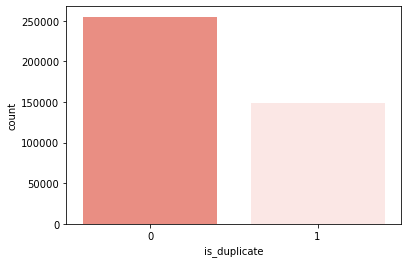

In [5]:
sns.countplot(x = 'is_duplicate', data = kc_train_full, palette = ['salmon', 'mistyrose'])

<ipython-input-10-c5999e7f6cbc>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

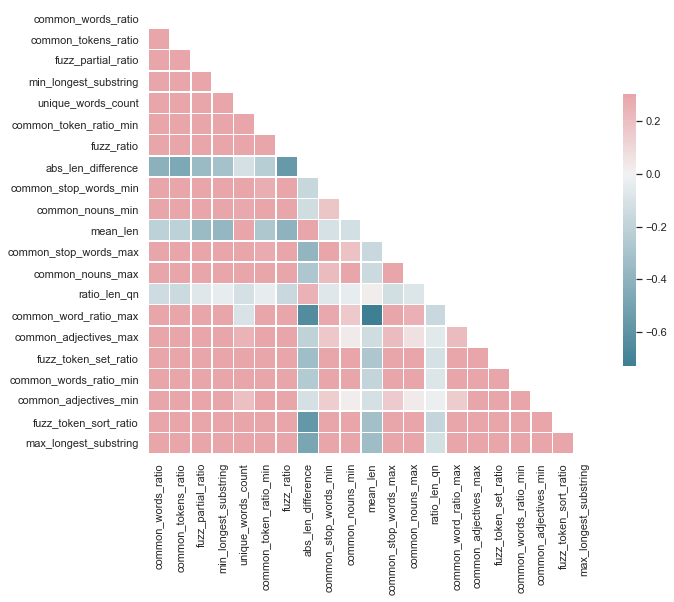

In [10]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = kc_train_full.drop(columns = ['is_duplicate'], axis = 1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
x_full = kc_train_full.drop(columns = ['question1', 'question2', 'is_duplicate'], axis = 1)
y_full = kc_train_full['is_duplicate']

In [14]:
x_train_full, x_test_full, y_train_full, y_test_full = train_test_split(x_full, y_full, test_size = 0.3)

In [15]:
logreg = LogisticRegression(random_state = 42)
logreg.fit(x_train_full, y_train_full)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=42)

In [16]:
y_pred_full = logreg.predict(x_test_full)
print("accuracy", accuracy_score(y_test_full, y_pred_full))
print("precision", precision_score(y_test_full, y_pred_full)) 
print("recall", recall_score(y_test_full, y_pred_full)) 
print("f1", f1_score(y_test_full, y_pred_full))

accuracy 0.6847542875989446
precision 0.5846457210464047
recall 0.4977838467048711
f1 0.5377295754893783


In [17]:
print(classification_report(y_test_full, y_pred_full))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76     76608
           1       0.58      0.50      0.54     44672

    accuracy                           0.68    121280
   macro avg       0.66      0.65      0.65    121280
weighted avg       0.68      0.68      0.68    121280



## Undersample Imbalanced Class

In [12]:
x_train_under, x_test_under, y_train_under, y_test_under = train_test_split(x_full, y_full, test_size = 0.3, random_state = 42)

In [13]:
undersample = RandomUnderSampler(sampling_strategy = 1, replacement = True)

In [14]:
x_train_under, y_train_under = undersample.fit_resample(x_train_under, y_train_under)

In [15]:
from collections import Counter
print(Counter(y_train_under))

Counter({0: 104667, 1: 104667})


In [16]:
logreg.fit(x_train_under, y_train_under)

/Users/Angelina_KC/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred_under = logreg.predict(x_test_under)
print("accuracy", accuracy_score(y_test_under, y_pred_under))
print("precision", precision_score(y_test_under, y_pred_under)) 
print("recall", recall_score(y_test_under, y_pred_under)) 
print("f1", f1_score(y_test_under, y_pred_under))

accuracy 0.6764099604221636
precision 0.5422129660308295
recall 0.7706072293479236
f1 0.6365429674838161


In [18]:
print(classification_report(y_test_under, y_pred_under))

              precision    recall  f1-score   support

           0       0.82      0.62      0.71     76684
           1       0.54      0.77      0.64     44596

    accuracy                           0.68    121280
   macro avg       0.68      0.70      0.67    121280
weighted avg       0.72      0.68      0.68    121280



## Cross Validation

In [19]:
cv_scores = cross_val_score(logreg, x_test_under, y_test_under, scoring = 'accuracy', cv = 5, n_jobs = -1)
print("Mean 5-Fold Accuracy: {}".format(np.mean(cv_scores)))

Mean 5-Fold Accuracy: 0.6789825197889182


In [20]:
print(cv_scores)

[0.68156332 0.66915402 0.67987302 0.68255277 0.68176946]


## Hyperparameter Tuning with RandomSearchCV

In [32]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train_under)

StandardScaler()

In [37]:
x_train_under = scaler.transform(x_train_under)
x_test_under = scaler.transform(x_test_under)

In [47]:
params = dict()
params['solver'] = ['sag', 'saga']
params['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
#params['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

In [48]:
#cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
search = RandomizedSearchCV(logreg, params, n_iter = 20, scoring = 'accuracy', n_jobs = -1, cv = 5)

In [49]:
results = search.fit(x_train_under, y_train_under)

/Users/Angelina_KC/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/Angelina_KC/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.68389273 0.68322872        nan 0.68322872 0.68386885 0.68321439
        nan        nan]
  warnings.warn(
/Users/Angelina_KC/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [50]:
results.best_params_

{'solver': 'sag', 'penalty': 'none'}

In [51]:
model = results.best_estimator_

In [52]:
y_pred_under = model.predict(x_test_under)
print("accuracy", accuracy_score(y_test_under, y_pred_under))
print("precision", precision_score(y_test_under, y_pred_under)) 
print("recall", recall_score(y_test_under, y_pred_under)) 
print("f1", f1_score(y_test_under, y_pred_under))

accuracy 0.6519624010554089
precision 0.5164660740904323
recall 0.8390662839716566
f1 0.6393787164240311


## RFE

In [ ]:
# Select best feature
rfe = RFE(logreg, n_features_to_select = None)
rfe = rfe.fit(x_train_full, y_train_full)

# Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
x_train_full.columns[rfe.support_]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[False  True False  True False  True False False  True False False  True
  True  True  True False False  True False False  True]
[ 8  1 12  1  2  1  7  9  1  4  3  1  1  1  1  6  5  1 11 10  1]


Index(['common_tokens_ratio', 'min_longest_substring',
       'common_token_ratio_min', 'common_stop_words_min',
       'common_stop_words_max', 'common_nouns_max', 'ratio_len_qn',
       'common_word_ratio_max', 'common_words_ratio_min',
       'max_longest_substring'],
      dtype='object')

In [ ]:
rfe_feats = x_train_full[x_train_full.columns[rfe.support_]]

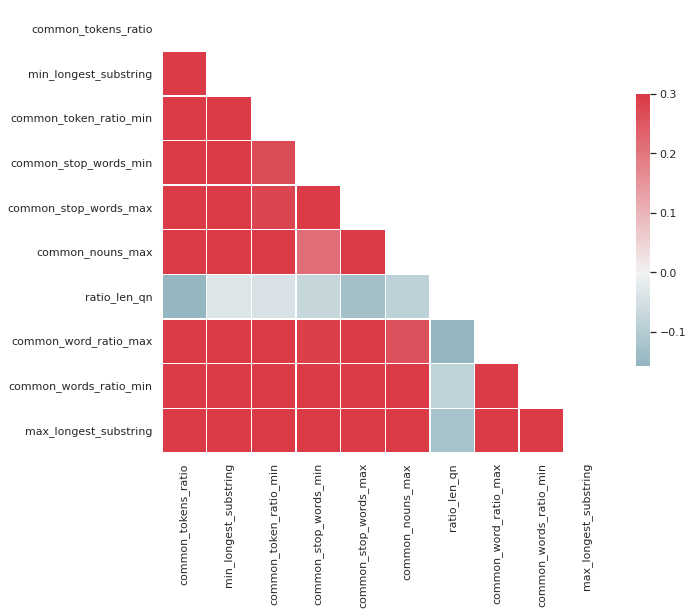

In [ ]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = rfe_feats.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
logreg.fit(rfe_feats, y_train_full)
y_pred_full = logreg.predict(x_test_full[x_test_full.columns[rfe.support_]])
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test_full[x_test_full.columns[rfe.support_]], y_test_full)))

Accuracy of logistic regression classifier on test set: 0.67


In [ ]:
print(classification_report(y_test_full, y_pred_full))

              precision    recall  f1-score   support

           0       0.71      0.80      0.76     76479
           1       0.57      0.45      0.50     44801

    accuracy                           0.67    121280
   macro avg       0.64      0.63      0.63    121280
weighted avg       0.66      0.67      0.66    121280

